In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mannwhitneyu
from scipy.stats import shapiro

In [4]:
file_path=r"C:\Users\Asus\Desktop\data.csv"
df=pd.read_csv(file_path)
df

,Order ID,Product ID,Sum of Quantity,Sum of Discount
0,AE-2011-9160,OFF-FEL-10001405,2,0.70
1,AE-2011-9160,TEC-EPS-10004171,6,0.70
2,AE-2013-1130,FUR-BUS-10003055,6,0.70
3,AE-2013-1130,OFF-ACC-10004278,1,0.70
4,AE-2013-1530,OFF-STI-10000114,2,0.70
...,...,...,...,...
29994,IT-2013-1083916,OFF-LA-10001676,2,0.00
29995,IT-2013-1083916,OFF-ST-10001195,1,0.10
29996,IT-2013-1083916,OFF-ST-10004046,2,0.10
29997,IT-2013-1083916,OFF-SU-10001886,4,0.00


In [5]:
df["status"]=df["Sum of Discount"].apply(lambda x:"no discount"if x==0 else "has discount")
distribution=pd.pivot_table(
    df,
    index="status",
    columns="Sum of Quantity",
    aggfunc="size",
    fill_value=0


)
distribution

Sum of Quantity,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
status,,,,,,,,,,,,,,,,
has discount,1216,3298,2986,1604,1459,827,707,353,312,68,47,37,30,46,1,0
no discount,2772,4327,3242,2151,1615,993,830,452,330,97,48,63,32,54,1,1


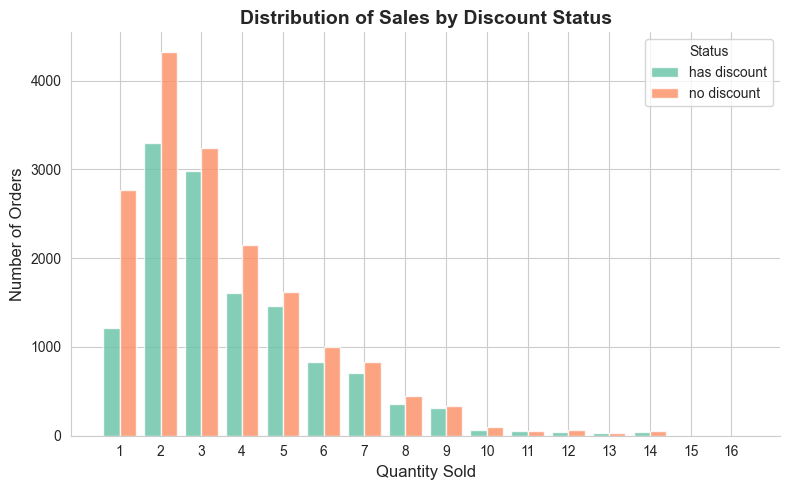

In [6]:
x = np.arange(len(distribution.columns))
width = 0.4


sns.set_style("whitegrid")
plt.figure(figsize=(8,5))

colors = sns.color_palette("Set2", n_colors=len(distribution.index))

for i, (status, color) in enumerate(zip(distribution.index, colors)):
    plt.bar(x + i*width, distribution.loc[status], width=width, alpha=0.8, label=status, color=color)

plt.xticks(x + width/2, distribution.columns)
plt.xlabel('Quantity Sold', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Distribution of Sales by Discount Status', fontsize=14, weight='bold')
plt.legend(title="Status", frameon=True)
sns.despine()
plt.tight_layout()
plt.show()


<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:2px solid #74b9ff; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p>
    بر اساس نمودار، توزیع تعداد آیتم‌های فروخته‌شده در دو گروه تخفیف‌دار و بدون تخفیف شکل مشابهی دارد. با این حال، در بیشتر مقادیر، تعداد سفارش‌های بدون تخفیف بیشتر از سفارش‌های تخفیف‌دار است. این نشان می‌دهد که در سطح توصیفی، تخفیف تأثیر واضحی بر افزایش تعداد فروش ندارد.
  </p>
</div>

C:\Users\Asus\AppData\Local\Temp\ipykernel_11456\2525850605.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


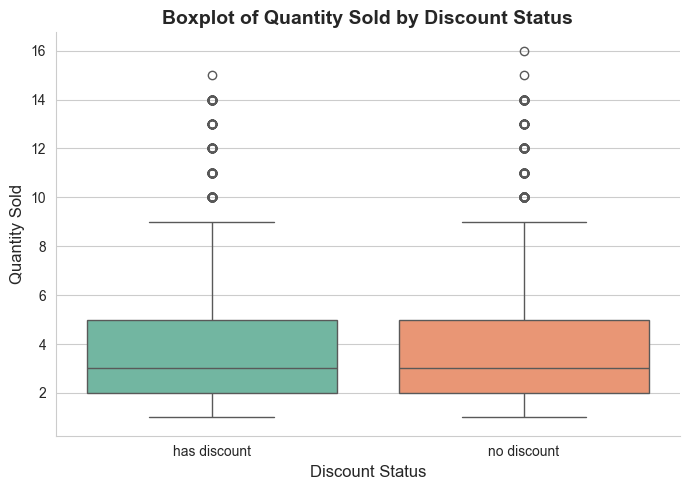

In [7]:
df_long = df[['Sum of Quantity', 'status']]


sns.set_style("whitegrid")
plt.figure(figsize=(7,5))


sns.boxplot(
    x='status', 
    y='Sum of Quantity', 
    data=df_long, 
    palette='Set2'
)


plt.xlabel('Discount Status', fontsize=12)
plt.ylabel('Quantity Sold', fontsize=12)
plt.title('Boxplot of Quantity Sold by Discount Status', fontsize=14, weight='bold')

sns.despine()
plt.tight_layout()
plt.show()

<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:2px solid #74b9ff; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p>
    بر اساس باکس پلات، توزیع تعداد آیتم‌های فروخته‌شده (Quantity Sold) در دو گروه تخفیف‌دار (has discount) و بدون تخفیف (no discount) بسیار مشابه است. میانه (median) هر دو گروه حدود ۳ آیتم است، که نشان‌دهنده این است که بیشتر فروش‌ها در هر دو گروه شامل تعداد کمی آیتم می‌شود.
  </p>
  <p>
    چارک‌ها (quartiles) نیز نزدیک به هم هستند، با این تفاوت که گروه بدون تخفیف کمی پراکندگی بیشتری دارد (box کمی بلندتر) و outliers (نقاط خارج از رنج) تا حدود ۱۶ می‌رسد، در حالی که گروه با تخفیف outliers کمتری دارد.
  </p>
  <p>
    این نشان می‌دهد که در سطح توصیفی، تخفیف تأثیر چشمگیری بر افزایش تعداد آیتم‌های فروخته‌شده ندارد و توزیع‌ها تقریباً یکسان هستند.
  </p>
</div>

In [10]:
no_discount = df[df["status"] == "no discount"]["Sum of Quantity"]
has_discount = df[df["status"] == "has discount"]["Sum of Quantity"]


stat_no, p_no = shapiro(no_discount) 
stat_has, p_has = shapiro(has_discount)

print('p_value for no Discount: ')
print(p_no)
print('\n')
print('p_value for Discount: ')
print(p_has)
print('\n')
print('\n')


p_value for no Discount: 
3.5337363116582667e-79


p_value for Discount: 
4.580088035111953e-72






<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:2px solid #74b9ff; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p>
    مقادیر p-value در تست Shapiro-Wilk برای هر دو گروه بدون تخفیف (3.53e-79) و با تخفیف (4.58e-72) بسیار کوچک‌تر از 0.05 است. این نشان‌دهنده آن است که توزیع در هر دو گروه غیرنرمال است و از توزیع نرمال به طور قابل توجهی فاصله دارد.
  </p>
  <p>
    بنابراین، استفاده از تست‌های ناپارامتریک مانند Mann-Whitney U برای مقایسه دو گروه مناسب است، زیرا این تست‌ها به فرض نرمال بودن داده‌ها وابسته نیستند.
  </p>
</div>

In [11]:
has_discount_counts = [1216, 3298, 2986, 1604, 1459, 827, 707, 353, 312, 68, 47, 37, 30, 46, 1, 0]
no_discount_counts  = [2772, 4327, 3242, 2151, 1615, 993, 830, 452, 330, 97, 48, 63, 32, 54, 1, 1]


quantities = np.arange(1, 17)


has_discount_list = np.repeat(quantities, has_discount_counts)
no_discount_list  = np.repeat(quantities, no_discount_counts)


stat, p_value = mannwhitneyu(has_discount_list, no_discount_list, alternative='two-sided')

print("Mann-Whitney U statistic:")
print(stat)
print("p-value:")
print(p_value)


Mann-Whitney U statistic:
119490403.0
p-value:
6.814911035215513e-35


<div style="font-family:Tahoma, sans-serif; direction:rtl; line-height:1.8; font-size:17px; text-align:justify; padding:12px; border:2px solid #74b9ff; border-radius:8px; box-sizing:border-box; max-width:100%; margin:0 auto;">
  <p>
    آماره Mann-Whitney U برابر با 119490403.0 است که نشان‌دهنده تفاوت قابل توجه بین دو گروه (با تخفیف و بدون تخفیف) است. مقدار p-value برابر با 6.81e-35 (بسیار کوچک‌تر از سطح معنی‌داری 0.05) می‌باشد, که فرض صفر (عدم تفاوت بین توزیع‌ها) را رد می‌کند.
  </p>
  <p>
بنابراین, تفاوت معنی‌داری بین تعداد آیتم‌های فروخته‌شده در گروه‌های تخفیف‌دار و بدون تخفیف وجود دارد, و تخفیف به طور قابل توجهی بر افزایش تعداد فروش تأثیر مثبت دارد.  </p>
</div>